# Titanic Model

## 1.Data import and readability

In [852]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib as mpl 
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [853]:
#importing and reading data
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [854]:
#Display data
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [855]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


We can see that the column "survived" will be the dependent feature and is missing in the training data.  

In [856]:
#Check the shape of our dataframe
train.shape

(891, 12)

In [857]:
test.shape

(418, 11)

In [858]:
#Check the data types of the data.
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [859]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [860]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [861]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

I'll use a heatmap to visualize the missing values in our dataset. 

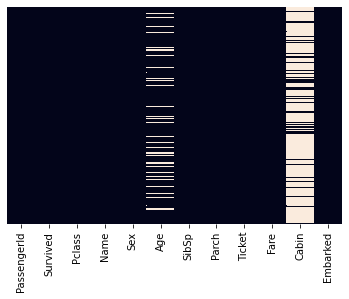

In [862]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

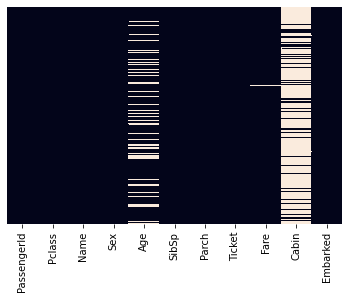

In [863]:
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)

The heatmaps display the missing values on each feature in our data set and helps us clean the data better. 

## 2.Exploratory Data Analysis

Lets separate numerical features from categorical features. 

In [864]:
cat_features = [ft for ft in train.columns if train[ft].dtypes == 'object']
cat_features

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [865]:
num_features =  [ft for ft in train.columns if train[ft].dtypes != 'object']
num_features

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Lets try to find a correlation between some of the feature by visualizing the survival rates in respect to some features. 

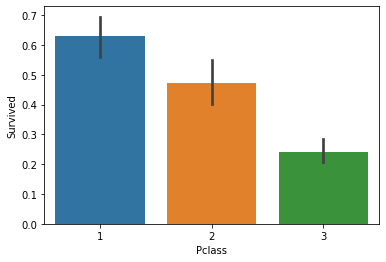

In [866]:
#Passenger class in relation to survival rate
sns.barplot(x='Pclass',y='Survived', data=train)

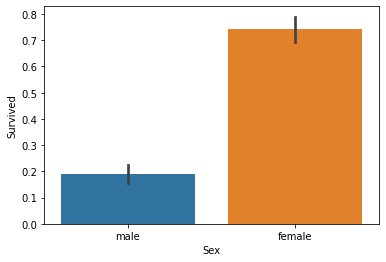

In [867]:
#gender of passenger in relation to survival rate
sns.barplot(x='Sex', y='Survived', data=train)

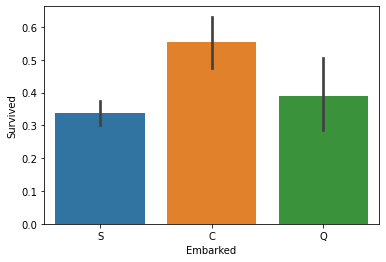

In [868]:
#Port of embarkment in relation with survival rate
sns.barplot(x='Embarked',y='Survived', data=train)

We can see that the following relations are true:
    - People from first class had a higher probability of survival. 
    - People that embarked from 'C' had a higher probability of survival.
    - If you were a woman you had higher chances to survive. 

**Lets proceed and separate the dependent variable as well as merging our data**

In [869]:
#Separates the dependent variable from the dataset. 
y_train = train['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [870]:
data = pd.concat([train,test]).reset_index(drop=True)
data.drop(['Survived'], axis=1, inplace=True)
print("The shape of the new dataframe is: {}".format(data.shape))

The shape of the new dataframe is: (1309, 11)


In [871]:
data.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

## 3. Feature Engineering

We are going to evaluate each feature to solve each one of the following issues:
    - Address missing values in the data. 
    - Combine or separate any features into new columnds which would facilitate the way we read the data.  
    - Get rid of features that do not provide any useful information.

In [872]:
#Group by Sex and Passenger Class and obtain the median age of each.
age_by_pclass = data.groupby(['Sex','Pclass'])['Age'].median()
for gender in ['female', 'male']:
    for pclass in range(1,4):
        print("The median age for {} in {}'s class is: {}".format(gender, pclass, age_by_pclass[gender][pclass]))
print("The median age of all passengers is: {}".format(data.Age.median()))

The median age for female in 1's class is: 36.0
The median age for female in 2's class is: 28.0
The median age for female in 3's class is: 22.0
The median age for male in 1's class is: 42.0
The median age for male in 2's class is: 29.5
The median age for male in 3's class is: 25.0
The median age of all passengers is: 28.0


In [873]:
#Replace the missing values in the 'Age' column.
data['Age'] = data.groupby(['Sex','Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))
data['Age'].isnull().sum()

0

In [874]:
#We replace the null values in Embarked with its mode.
data['Embarked'] = data['Embarked'].fillna('C')
data['Embarked'].isnull().sum()

0

In [875]:
#We can check the one value that is missing in the Fare column to gain some insight on the fare the passenger would have
data[data['Fare'].isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [876]:
# We calculate the median values for the features given for the passenger and then fill up the missing value in the dataset.
med_fare = data['Fare'][data['Pclass']==3][data['Sex'] == 'male'][data['Embarked']== 'S'].median()

data['Fare'] = data['Fare'].fillna(med_fare)

In [877]:
#We are going to drop the cabin feature due to its high amount of missing values. 
data.drop('Cabin', axis=1, inplace=True)

data.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

We Have no more missing values in our data. Now we proceed to modify features to simplify things.

In [878]:
#We are going to combine the SibSp feature and the Parch feature into a single new feature: "FamSize"
data['FamSize'] = data.SibSp + data.Parch + 1

#We procede to get rid of the other two features.
data.drop(['Parch', 'SibSp'], axis=1, inplace=True)

In [879]:
#We calculate the fare per person of each family. 
data['Fare_per_person'] = data['Fare']/data['FamSize']

#We now can drop the original 'Fare' column.
data.drop('Fare', axis=1, inplace=True)

Now Lets get rid of all the columns that do not give any significant value to the model. 

In [880]:
#Drops all columns that are not significant.
data.drop(['Name', 'Ticket'], axis=1, inplace=True)

In [881]:
data.head()

,PassengerId,Pclass,Sex,Age,Embarked,FamSize,Fare_per_person
0,1,3,male,22.0,S,2,3.62500
1,2,1,female,38.0,C,2,35.64165
2,3,3,female,26.0,S,1,7.92500
3,4,1,female,35.0,S,2,26.55000
4,5,3,male,35.0,S,1,8.05000


Lets make all categorical features into numerical values we can use. 

In [882]:
#Create a list of all the categorical features in the dataset.
cat_features = [feature for feature in data.columns if data[feature].dtype == 'object']

#Replace all the values in the categorical features with numerical values.
le = LabelEncoder()
for ft in cat_features:
    le.fit(data[ft].values)
    data[ft] = le.transform(data[ft].values)
data.head()

,PassengerId,Pclass,Sex,Age,Embarked,FamSize,Fare_per_person
0,1,3,1,22.0,2,2,3.62500
1,2,1,0,38.0,0,2,35.64165
2,3,3,0,26.0,2,1,7.92500
3,4,1,0,35.0,2,2,26.55000
4,5,3,1,35.0,2,1,8.05000


In [883]:
# Lets Count the number of values on our training set dependent variable.
y_l = y_train.count()


# Now we separate the test and training data for fitting the model.
X_train = data[:y_l]
X_test = data[y_l:]




**Lets take a moment and explore the correlation with the preprocessed data.**

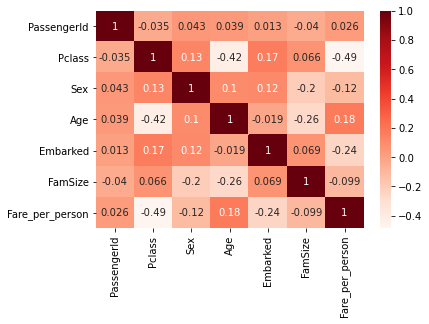

In [884]:
#We can take a look to see if there are any correlations in the data using Pearsons method. 
x_cor = X_train.corr()
sns.heatmap(x_cor, annot=True, cmap='Reds')

If we analyze the previous correlation heatmap we can infer the following information:
    - There is a slight negative correlation between Passenger class and Age meaning that people that had a 1st class ticket tend it to be older. Those in 3rd class had a tendency to be younger people. 
    - The same can be seen for Passenger Class and Fare_per_person. It makes sense that if you wanted a 1st class ticket it would be more expensive than if you wanted a a 3rd class ticket. 

Lets make some bar plots to illustrate the previous points:

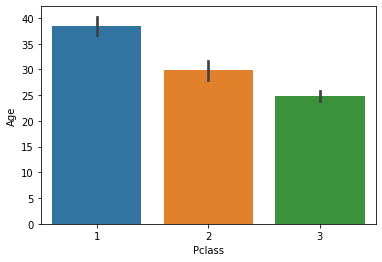

In [885]:
sns.barplot(x=X_train['Pclass'],y=X_train['Age'],data=X_train)

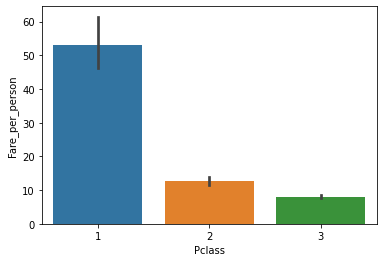

In [886]:
sns.barplot(x=X_train['Pclass'],y=X_train['Fare_per_person'],data=X_train)

## 4. Let's fit the model and make our prediction.

In [887]:
# We create the Random Forest Classifier object
rf = RandomForestClassifier(n_estimators=100, max_depth=4)

# Lets train the model
rf.fit(X_train, y_train)

# Finally lets make our prediction. 
prediction = rf.predict(X_test)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

Finally let's write our prediciton into a dataframe and into a csv file to store it in our computer. 

In [888]:
final_s = pd.DataFrame()
final_s['PassengerId'] = X_test['PassengerId']
final_s['Survived'] = prediction
final_s.to_csv("titanic_sub.csv",index=False)